# import libraties

In [18]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

# create and preprocess dataset

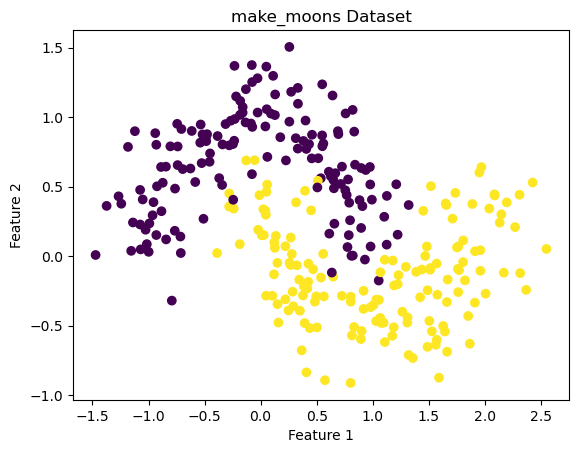

In [6]:
X, _ = make_moons(n_samples=300, noise=0.2, random_state=42)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("make_moons Dataset")
plt.show()

why I chose StandardardScaler:

* Ensures all features contribute equally to distance calculations
* Preserves relative structure of the data
* Works well with Euclidean, Manhattan, and Ward linkage
* Makes DBSCAN parameters (eps, min_samples) interpretable across dimensions

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train dbscan

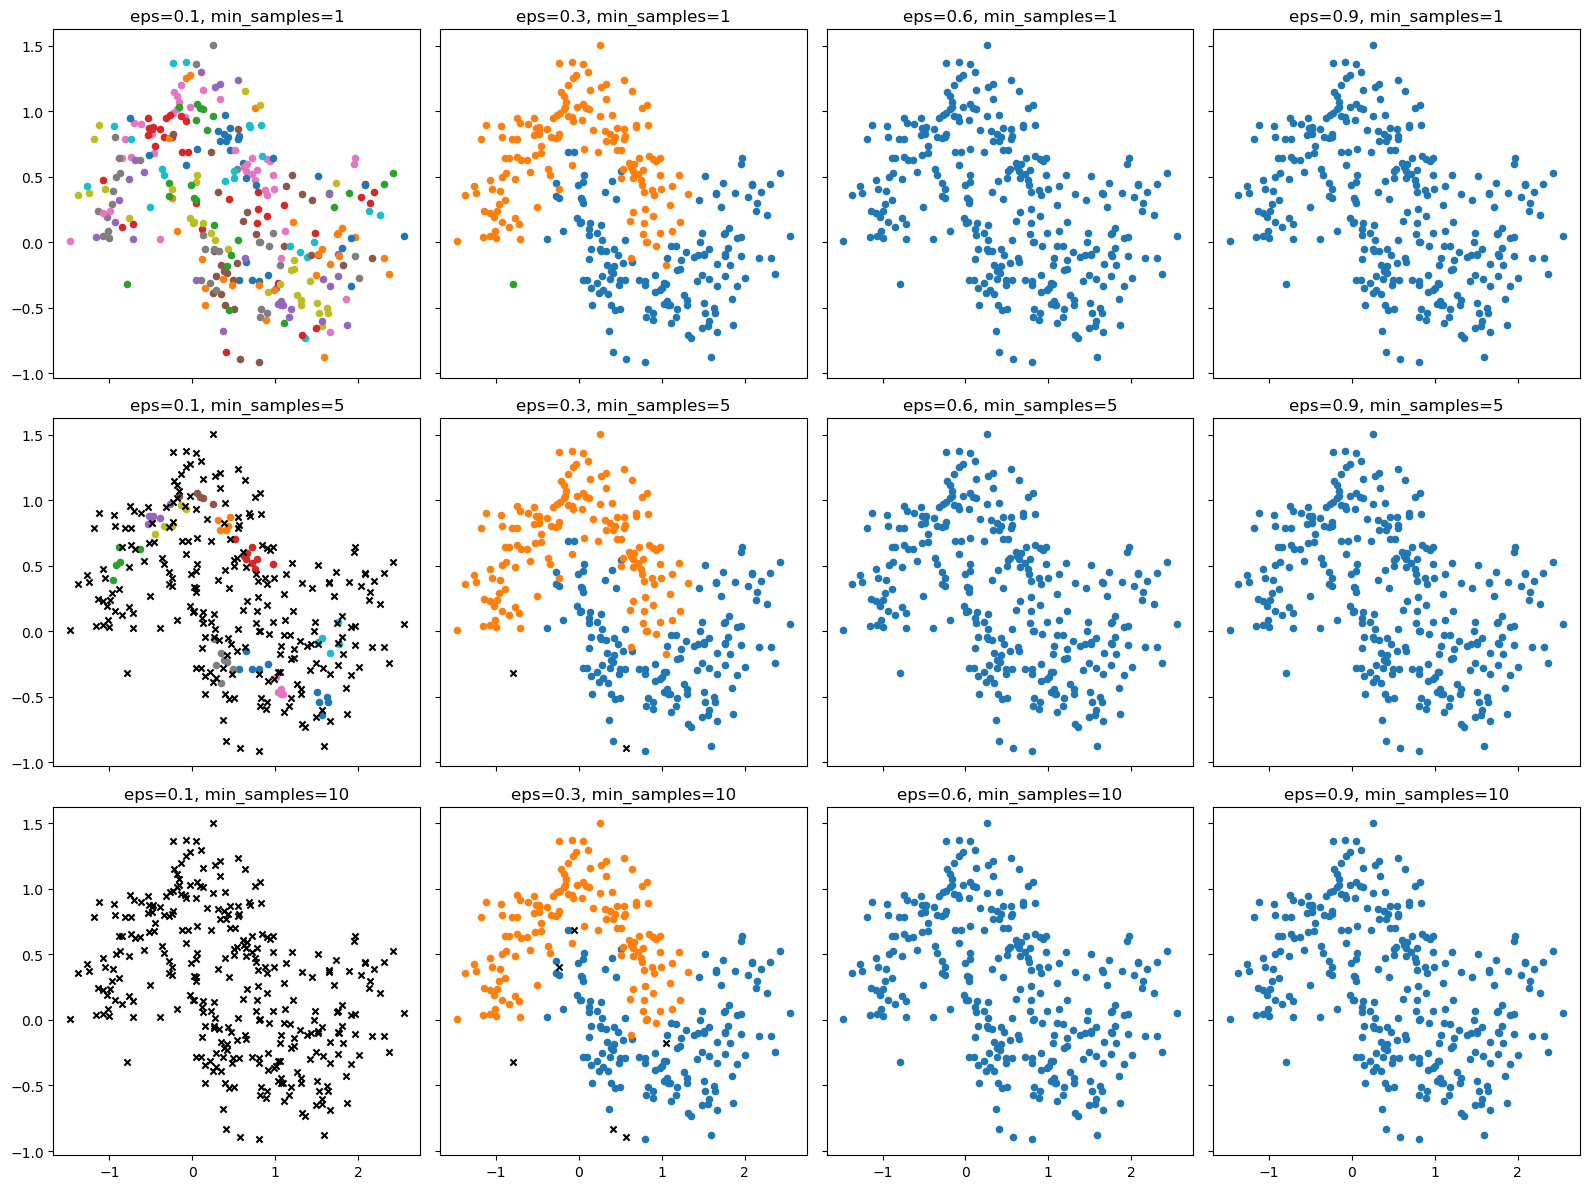

In [37]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(16, 12),
    sharex=True,
    sharey=True
)

min_samples_list = [1, 5, 10]
eps_list = [0.1, 0.3, 0.6, 0.9]

for i, min_samples in enumerate(min_samples_list):
    for j, eps in enumerate(eps_list):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        ax = axes[i, j]

        # Plot clusters
        unique_labels = set(labels)
        for label in unique_labels:
            if label == -1:
                ax.scatter(
                    X[labels == label, 0],
                    X[labels == label, 1],
                    c='black',
                    marker='x',
                    s=20,
                    label='Noise'
                )
            else:
                ax.scatter(
                    X[labels == label, 0],
                    X[labels == label, 1],
                    s=20
                )

        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        # print(silhouette_score(X, labels))
plt.tight_layout()
plt.show()

In [48]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

silhouette_score(X, labels)

np.float64(0.208450909822112)

# train AgglomerativeClustering

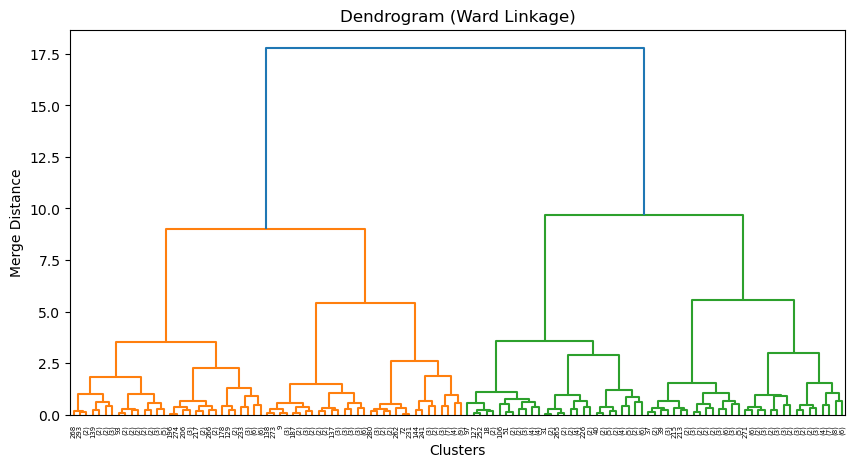

In [13]:
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=6)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Merge Distance")
plt.show()


In [26]:
cutoffs = [2.5, 5.0, 8.0, 10]  # distances chosen from dendrogram
clusterings = {}

for c in cutoffs:
    labels = fcluster(Z, t=c, criterion='distance')
    clusterings[c] = labels

In [27]:
for c, labels in clusterings.items():
    n_clusters = len(np.unique(labels))
    score = silhouette_score(X, labels)
    print(f"Cutoff = {c:.1f} | Clusters = {n_clusters} | Silhouette = {score:.3f}")

Cutoff = 2.5 | Clusters = 11 | Silhouette = 0.348
Cutoff = 5.0 | Clusters = 6 | Silhouette = 0.351
Cutoff = 8.0 | Clusters = 4 | Silhouette = 0.363
Cutoff = 10.0 | Clusters = 2 | Silhouette = 0.395


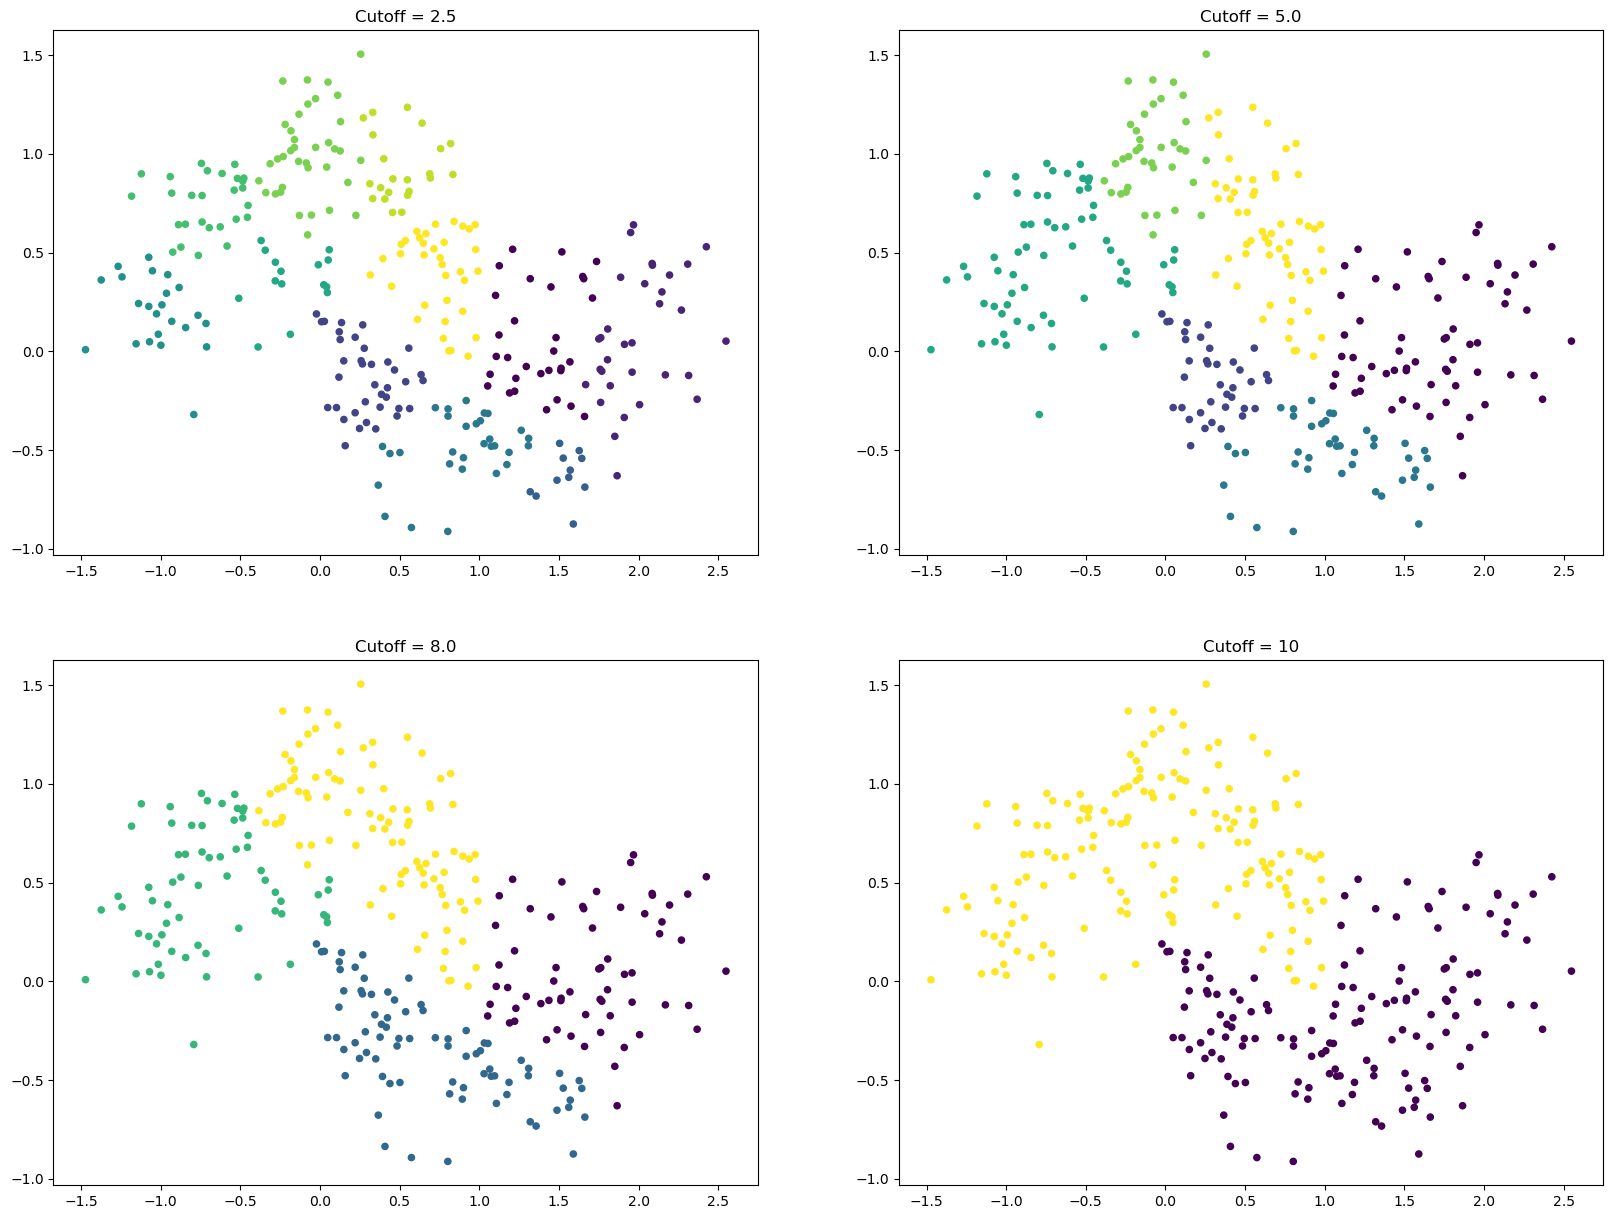

In [33]:
plt.figure(figsize=(20, 15))

for i, (c, labels) in enumerate(clusterings.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis')
    plt.title(f"Cutoff = {c}")
    
plt.show()
